In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Computer Hardware.csv')

In [3]:
data

,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


##Data recognition & general analytics

In [4]:
data.describe()

,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [5]:
data.shape

(208, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Seller Name                        208 non-null    object
 1   Model Name                         208 non-null    object
 2   Machine Cycle Time in nanoseconds  208 non-null    int64 
 3   Minimum Main Memory in Kilobytes   208 non-null    int64 
 4   Maximum Main Memory in kilobytes   208 non-null    int64 
 5   Cache Memory in Kilobytes          208 non-null    int64 
 6   Minimum Channels in Units          208 non-null    int64 
 7   Maximum Channels in Units          208 non-null    int64 
 8   Published Relative Performance     208 non-null    int64 
 9   Estimated Relative Performance     208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [7]:
data.isnull().sum()

Seller Name                          0
Model Name                           0
Machine Cycle Time in nanoseconds    0
Minimum Main Memory in Kilobytes     0
Maximum Main Memory in kilobytes     0
Cache Memory in Kilobytes            0
Minimum Channels in Units            0
Maximum Channels in Units            0
Published Relative Performance       0
Estimated Relative Performance       0
dtype: int64

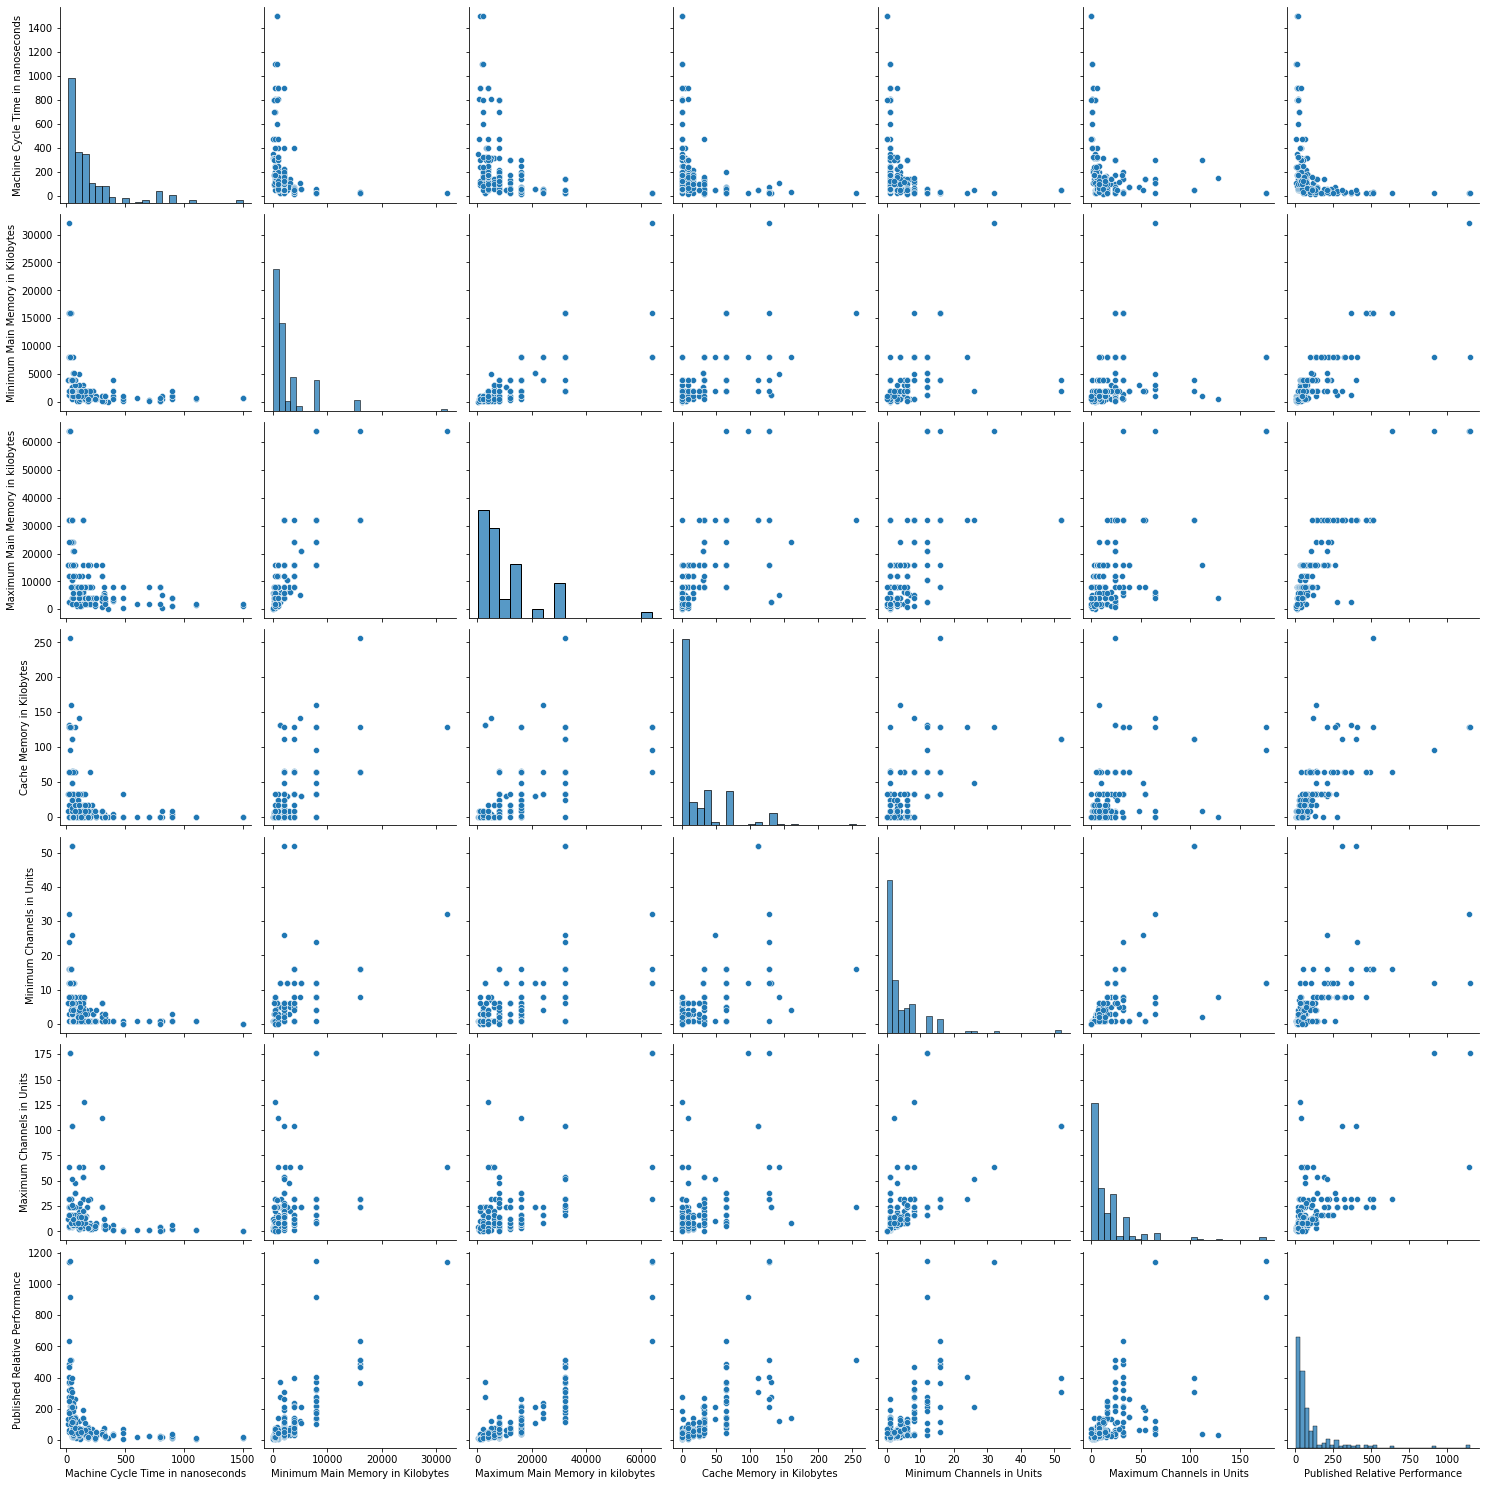

In [8]:
sns.pairplot(data.iloc[:,2:9],diag_kind="hist",height=3)

##Main analysis & Multiple regression model

In [9]:
x_data = data.iloc[:,2:8]
y_data = data.iloc[:,9]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3,random_state=101)

In [11]:
modelling = LinearRegression()

In [12]:
modelling.fit(X_train,y_train)

LinearRegression()

In [13]:
predictions = modelling.predict(X_test)

In [14]:
modelling.coef_

array([0.05989527, 0.01436528, 0.00678406, 0.42049962, 0.43994547,
       0.97840151])

In [15]:
predictions

array([  4.99175952,  16.30291128,  11.07228188,  40.91579233,
        37.15143789,  63.63143699, 105.06174741, 257.34073275,
        31.09916748, 199.15042682, 152.80988001, -36.63855582,
        72.92118829, 324.60665823, 119.9419504 , -28.95607152,
        10.24456482, -13.34710868,  89.51011902,  24.02954357,
        87.22990185,  87.22990185, 523.30523068,  47.89261674,
       -21.28535532,  21.64312538,  -3.0038903 ,  31.02974665,
       114.0327493 ,  17.46163618,   6.26413553,  27.34487551,
        33.07600109, 318.43882494, 141.00585327,  44.68516133,
       194.89836486,  94.84481241,  98.6959155 ,  17.61377806,
        89.51011902, 142.94408823,  75.45953748, 385.67798395,
       121.17416418,  20.63424145,   6.65668233, 324.72644877,
       718.60605181, 296.97593903, 174.58881644, -18.88096707,
        82.97709025, 331.71512711, -12.69671959, 318.43882494,
        56.99061667,  93.29878649,  55.60685032,  -2.52224603,
        59.76030739, -10.40233384, 257.34073275])

In [16]:
df_temp= pd.DataFrame({'Estimated Relative Performance':list(y_test),'Published Relative Performance':predictions})
df_temp

,Estimated Relative Performance,Published Relative Performance
0,29,4.991760
1,31,16.302911
2,31,11.072282
3,48,40.915792
4,41,37.151438
...,...,...
58,53,55.606850
59,23,-2.522246
60,47,59.760307
61,29,-10.402334


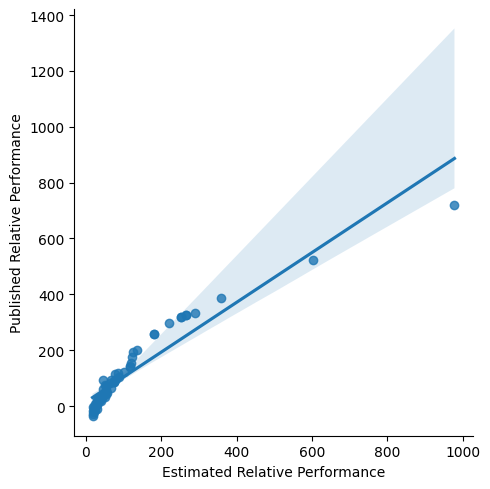

In [17]:
sns.lmplot(x='Estimated Relative Performance',y='Published Relative Performance',data=df_temp)

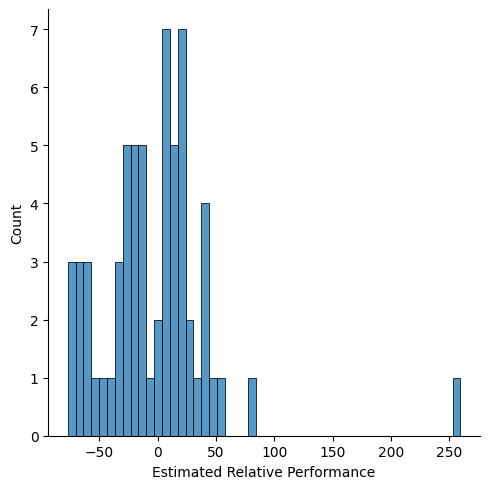

In [18]:
sns.displot((y_test-predictions),bins=50)

In [19]:
predict_all = modelling.predict(x_data)

In [20]:
df_temp2=pd.DataFrame({'Estimated Relative Performance':list(data['Estimated Relative Performance']),
'Predicts':predict_all,'Published Relative Performance':list(data['Published Relative Performance'])})

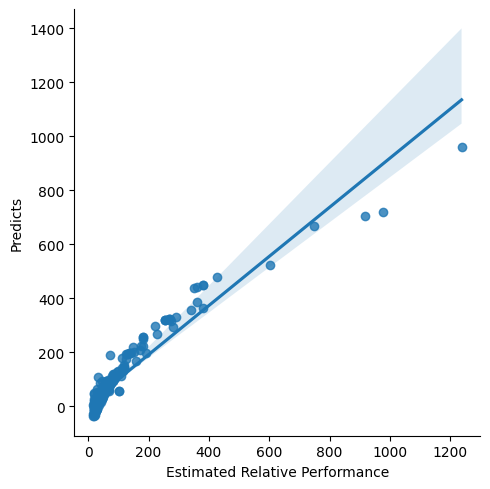

In [21]:
sns.lmplot(x='Estimated Relative Performance',y='Predicts',data=df_temp2)